In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier 
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingClassifier
from xgboost import XGBClassifier

In [2]:
df = pd.read_csv("U.S._Chronic_Disease_Indicators__CDI_.csv")
df

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_98022/3397387396.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("U.S._Chronic_Disease_Indicators__CDI_.csv")


,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,DataValueUnit,DataValueType,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,...,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,...,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,NaN,Number,...,2,ALC,ALC6_0,NMBR,OVERALL,OVR,NaN,NaN,NaN,NaN
3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,NaN,Number,...,2,CKD,CKD1_0,NMBR,RACE,WHT,NaN,NaN,NaN,NaN
4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,NaN,Number,...,2,CKD,CKD1_0,NMBR,RACE,WHT,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,NaN,%,Crude Prevalence,...,53,NPAW,NPAW1_1,CRDPREV,RACE,BLK,NaN,NaN,NaN,NaN
1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,NaN,%,Age-adjusted Prevalence,...,54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT,NaN,NaN,NaN,NaN
1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,NaN,%,Crude Prevalence,...,56,COPD,COPD7_0,CRDPREV,RACE,WHT,NaN,NaN,NaN,NaN
1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,NaN,%,Crude Prevalence,...,50,OVC,OVC6_2,CRDPREV,RACE,OTH,NaN,NaN,NaN,NaN


In [3]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

YearStart                          0
YearEnd                            0
LocationAbbr                       0
LocationDesc                       0
DataSource                         0
Topic                              0
Question                           0
Response                     1082328
DataValueUnit                 139390
DataValueType                      0
DataValue                     353093
DataValueAlt                  355136
DataValueFootnoteSymbol       715575
DatavalueFootnote             715575
LowConfidenceLimit            465077
HighConfidenceLimit           465077
StratificationCategory1            0
Stratification1                    0
StratificationCategory2      1082328
Stratification2              1082328
StratificationCategory3      1082328
Stratification3              1082328
GeoLocation                     9196
ResponseID                   1082328
LocationID                         0
TopicID                            0
QuestionID                         0
D

,column_name,percent_missing
YearStart,YearStart,0.000000
YearEnd,YearEnd,0.000000
LocationAbbr,LocationAbbr,0.000000
LocationDesc,LocationDesc,0.000000
DataSource,DataSource,0.000000
Topic,Topic,0.000000
Question,Question,0.000000
Response,Response,100.000000
DataValueUnit,DataValueUnit,12.878721
DataValueType,DataValueType,0.000000


In [4]:
df = df.drop(columns = ['Response','StratificationCategory2','Stratification2','StratificationCategory3','Stratification3','ResponseID','StratificationCategoryID2','StratificationID2','StratificationCategoryID3','StratificationID3'])

In [5]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,70,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,221,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,234,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,37.2,...,44.4,Race/Ethnicity,"Black, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),53,NPAW,NPAW1_1,CRDPREV,RACE,BLK
1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Age-adjusted Prevalence,47.6,...,52.2,Race/Ethnicity,"White, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT
1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,58.2,...,65.6,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD7_0,CRDPREV,RACE,WHT
1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,%,Crude Prevalence,90.5,...,96.0,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC6_2,CRDPREV,RACE,OTH


In [6]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                139390
DataValueType                     0
DataValue                    353093
DataValueAlt                 355136
DataValueFootnoteSymbol      715575
DatavalueFootnote            715575
LowConfidenceLimit           465077
HighConfidenceLimit          465077
StratificationCategory1           0
Stratification1                   0
GeoLocation                    9196
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64


,column_name,percent_missing
YearStart,YearStart,0.000000
YearEnd,YearEnd,0.000000
LocationAbbr,LocationAbbr,0.000000
LocationDesc,LocationDesc,0.000000
DataSource,DataSource,0.000000
Topic,Topic,0.000000
Question,Question,0.000000
DataValueUnit,DataValueUnit,12.878721
DataValueType,DataValueType,0.000000
DataValue,DataValue,32.623475


In [7]:
df = df.drop(columns = ['DataValueFootnoteSymbol','DatavalueFootnote'])

In [8]:
df.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,70,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,221,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,234,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT


In [10]:
df.shape

(1082328, 22)

In [ ]:
df['STATE'].value_counts().to_frame()

In [11]:
df['YearStart'].value_counts().sort_index()

2001       104
2007        55
2008     20076
2009     20500
2010     49497
2011    102363
2012    103685
2013    118802
2014    116761
2015    106118
2016     96916
2017    104462
2018     95780
2019     89588
2020     57567
2021        54
Name: YearStart, dtype: int64

In [17]:
df['TopicID'].unique()

array(['ALC', 'CKD', 'CVD', 'DIA', 'TOB', 'AST', 'DIS', 'OVC', 'OLD',
       'RPH', 'ORH', 'NPAW', 'CAN', 'MTH', 'ART', 'COPD', 'IMM'],
      dtype=object)

<AxesSubplot:>

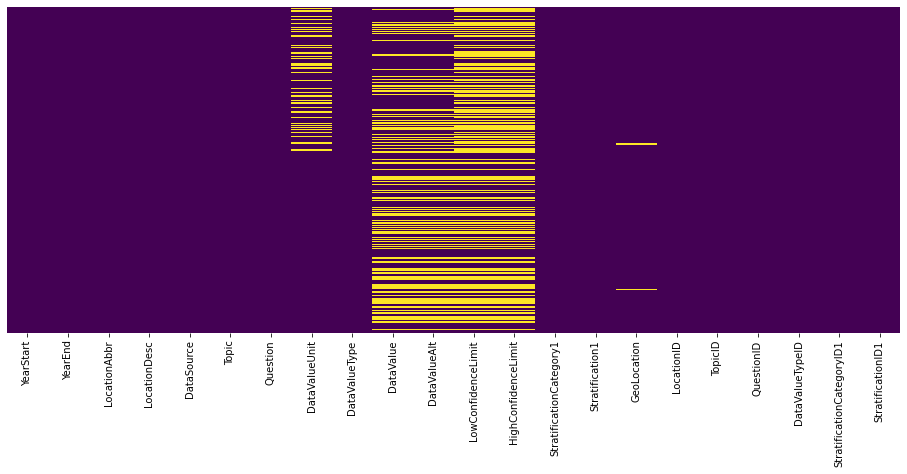

In [18]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(16, 6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [19]:
df.to_csv('CDC.csv')

In [ ]:
include = df[df.YearStart == year] 

In [23]:
df = pd.read_csv('CDC.csv')
df

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_98022/1261999835.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('CDC.csv')


,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,%,Crude Prevalence,...,44.4,Race/Ethnicity,"Black, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),53,NPAW,NPAW1_1,CRDPREV,RACE,BLK
1082324,1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,%,Age-adjusted Prevalence,...,52.2,Race/Ethnicity,"White, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT
1082325,1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,%,Crude Prevalence,...,65.6,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD7_0,CRDPREV,RACE,WHT
1082326,1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,%,Crude Prevalence,...,96.0,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC6_2,CRDPREV,RACE,OTH


In [24]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

Unnamed: 0                        0
YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                139390
DataValueType                     0
DataValue                    353093
DataValueAlt                 355136
LowConfidenceLimit           465077
HighConfidenceLimit          465077
StratificationCategory1           0
Stratification1                   0
GeoLocation                    9196
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
YearStart,YearStart,0.000000
YearEnd,YearEnd,0.000000
LocationAbbr,LocationAbbr,0.000000
LocationDesc,LocationDesc,0.000000
DataSource,DataSource,0.000000
Topic,Topic,0.000000
Question,Question,0.000000
DataValueUnit,DataValueUnit,12.878721
DataValueType,DataValueType,0.000000


In [25]:
df.shape

(1082328, 23)

In [26]:
df = df.drop(columns = ['LowConfidenceLimit','HighConfidenceLimit','DataValueUnit','DataValue','DataValueAlt'])

In [27]:
df

,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueType,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,Number,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,Number,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,Number,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,Number,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,Number,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,Crude Prevalence,Race/Ethnicity,"Black, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),53,NPAW,NPAW1_1,CRDPREV,RACE,BLK
1082324,1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,Age-adjusted Prevalence,Race/Ethnicity,"White, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT
1082325,1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,Crude Prevalence,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD7_0,CRDPREV,RACE,WHT
1082326,1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,Crude Prevalence,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC6_2,CRDPREV,RACE,OTH


In [28]:
df.shape

(1082328, 18)

In [29]:
print(df.isnull().sum())

percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

Unnamed: 0                      0
YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
DataSource                      0
Topic                           0
Question                        0
DataValueType                   0
StratificationCategory1         0
Stratification1                 0
GeoLocation                  9196
LocationID                      0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
StratificationCategoryID1       0
StratificationID1               0
dtype: int64


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.00000
YearStart,YearStart,0.00000
YearEnd,YearEnd,0.00000
LocationAbbr,LocationAbbr,0.00000
LocationDesc,LocationDesc,0.00000
DataSource,DataSource,0.00000
Topic,Topic,0.00000
Question,Question,0.00000
DataValueType,DataValueType,0.00000
StratificationCategory1,StratificationCategory1,0.00000


In [30]:
df = df.drop(columns = ['Unnamed: 0'])

In [31]:
df

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueType,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,Number,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,Number,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,Number,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,Number,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,Number,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1082323,2020,2020,WA,Washington,BRFSS,"Nutrition, Physical Activity, and Weight Status",Obesity among adults aged >= 18 years,Crude Prevalence,Race/Ethnicity,"Black, non-Hispanic",POINT (-120.47001078999972 47.52227862900048),53,NPAW,NPAW1_1,CRDPREV,RACE,BLK
1082324,2020,2020,WV,West Virginia,BRFSS,Chronic Obstructive Pulmonary Disease,Prevalence of current smoking among adults >= ...,Age-adjusted Prevalence,Race/Ethnicity,"White, non-Hispanic",POINT (-80.71264013499967 38.66551020200046),54,COPD,COPD3_0_1,AGEADJPREV,RACE,WHT
1082325,2020,2020,WY,Wyoming,BRFSS,Chronic Obstructive Pulmonary Disease,Influenza vaccination among noninstitutionaliz...,Crude Prevalence,Race/Ethnicity,"White, non-Hispanic",POINT (-108.10983035299967 43.23554134300048),56,COPD,COPD7_0,CRDPREV,RACE,WHT
1082326,2020,2020,VT,Vermont,BRFSS,Overarching Conditions,Self-rated health status among women aged 18-4...,Crude Prevalence,Race/Ethnicity,"Other, non-Hispanic",POINT (-72.51764079099962 43.62538123900049),50,OVC,OVC6_2,CRDPREV,RACE,OTH


In [32]:
df2 = pd.read_csv('CDC.csv')
df2.shape

/var/folders/l4/3ctxtv0s4f10lcsxz1mr2_080000gn/T/ipykernel_98022/3115445761.py:1: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df2 = pd.read_csv('CDC.csv')


(1082328, 23)

In [34]:
print(df2.isnull().sum())

percent_missing = df2.isnull().sum() * 100 / len(df2)
missing_value_df = pd.DataFrame({'column_name': df2.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

Unnamed: 0                        0
YearStart                         0
YearEnd                           0
LocationAbbr                      0
LocationDesc                      0
DataSource                        0
Topic                             0
Question                          0
DataValueUnit                139390
DataValueType                     0
DataValue                    353093
DataValueAlt                 355136
LowConfidenceLimit           465077
HighConfidenceLimit          465077
StratificationCategory1           0
Stratification1                   0
GeoLocation                    9196
LocationID                        0
TopicID                           0
QuestionID                        0
DataValueTypeID                   0
StratificationCategoryID1         0
StratificationID1                 0
dtype: int64


,column_name,percent_missing
Unnamed: 0,Unnamed: 0,0.000000
YearStart,YearStart,0.000000
YearEnd,YearEnd,0.000000
LocationAbbr,LocationAbbr,0.000000
LocationDesc,LocationDesc,0.000000
DataSource,DataSource,0.000000
Topic,Topic,0.000000
Question,Question,0.000000
DataValueUnit,DataValueUnit,12.878721
DataValueType,DataValueType,0.000000


In [36]:
df2.head()

,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
0,0,2010,2010,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
1,1,2017,2017,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
2,2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
3,3,2011,2011,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT
4,4,2012,2012,AK,Alaska,NVSS,Chronic Kidney Disease,Mortality with end-stage renal disease,NaN,Number,...,NaN,Race/Ethnicity,"White, non-Hispanic",POINT (-147.72205903599973 64.84507995700051),2,CKD,CKD1_0,NMBR,RACE,WHT


In [48]:
temp = df2[df2['YearStart'].isin([2018, 2019, 2020, 2021])]

In [49]:
temp.shape

(242989, 23)

In [51]:
temp.isnull().sum()

Unnamed: 0                       0
YearStart                        0
YearEnd                          0
LocationAbbr                     0
LocationDesc                     0
DataSource                       0
Topic                            0
Question                         0
DataValueUnit                13732
DataValueType                    0
DataValue                    79172
DataValueAlt                 79915
LowConfidenceLimit           95139
HighConfidenceLimit          95139
StratificationCategory1          0
Stratification1                  0
GeoLocation                   1686
LocationID                       0
TopicID                          0
QuestionID                       0
DataValueTypeID                  0
StratificationCategoryID1        0
StratificationID1                0
dtype: int64

In [53]:
temp.head()   

,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
2,2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
6,6,2018,2018,AK,Alaska,NVSS,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,...,162.2,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,CVD,CVD1_1,CRDRATE,OVERALL,OVR
30,30,2018,2018,AL,Alabama,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,Number,...,NaN,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,CVD,CVD1_3,NMBR,GENDER,GENM
44,44,2018,2018,AR,Arkansas,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,Number,...,NaN,Gender,Female,POINT (-92.27449074299966 34.74865012400045),5,CVD,CVD1_3,NMBR,GENDER,GENF
56,56,2018,2018,AZ,Arizona,NVSS,Cardiovascular Disease,Mortality from total cardiovascular diseases,NaN,Number,...,NaN,Race/Ethnicity,Asian or Pacific Islander,POINT (-111.76381127699972 34.865970280000454),4,CVD,CVD1_1,NMBR,RACE,API


In [54]:
temp.head()

,Unnamed: 0,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
2,2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
6,6,2018,2018,AK,Alaska,NVSS,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,...,162.2,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,CVD,CVD1_1,CRDRATE,OVERALL,OVR
30,30,2018,2018,AL,Alabama,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,Number,...,NaN,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,CVD,CVD1_3,NMBR,GENDER,GENM
44,44,2018,2018,AR,Arkansas,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,Number,...,NaN,Gender,Female,POINT (-92.27449074299966 34.74865012400045),5,CVD,CVD1_3,NMBR,GENDER,GENF
56,56,2018,2018,AZ,Arizona,NVSS,Cardiovascular Disease,Mortality from total cardiovascular diseases,NaN,Number,...,NaN,Race/Ethnicity,Asian or Pacific Islander,POINT (-111.76381127699972 34.865970280000454),4,CVD,CVD1_1,NMBR,RACE,API


In [55]:
temp = temp.drop(columns = ['Unnamed: 0'])

In [57]:
temp.head()

,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,DataValueUnit,DataValueType,DataValue,...,HighConfidenceLimit,StratificationCategory1,Stratification1,GeoLocation,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1
2,2018,2018,AK,Alaska,NVSS,Alcohol,Chronic liver disease mortality,NaN,Number,121,...,NaN,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,ALC,ALC6_0,NMBR,OVERALL,OVR
6,2018,2018,AK,Alaska,NVSS,Cardiovascular Disease,Mortality from total cardiovascular diseases,"cases per 100,000",Crude Rate,153.2,...,162.2,Overall,Overall,POINT (-147.72205903599973 64.84507995700051),2,CVD,CVD1_1,CRDRATE,OVERALL,OVR
30,2018,2018,AL,Alabama,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,Number,3056,...,NaN,Gender,Male,POINT (-86.63186076199969 32.84057112200048),1,CVD,CVD1_3,NMBR,GENDER,GENM
44,2018,2018,AR,Arkansas,NVSS,Cardiovascular Disease,Mortality from coronary heart disease,NaN,Number,2022,...,NaN,Gender,Female,POINT (-92.27449074299966 34.74865012400045),5,CVD,CVD1_3,NMBR,GENDER,GENF
56,2018,2018,AZ,Arizona,NVSS,Cardiovascular Disease,Mortality from total cardiovascular diseases,NaN,Number,260,...,NaN,Race/Ethnicity,Asian or Pacific Islander,POINT (-111.76381127699972 34.865970280000454),4,CVD,CVD1_1,NMBR,RACE,API


In [58]:
temp = temp.drop(columns = ['LowConfidenceLimit','HighConfidenceLimit','DataValueUnit','DataValue','DataValueAlt'])

In [60]:
temp.shape

(242989, 17)

In [61]:
print(temp.isnull().sum())

percent_missing = temp.isnull().sum() * 100 / len(temp)
missing_value_df = pd.DataFrame({'column_name': temp.columns,
                                 'percent_missing': percent_missing})
missing_value_df 

YearStart                       0
YearEnd                         0
LocationAbbr                    0
LocationDesc                    0
DataSource                      0
Topic                           0
Question                        0
DataValueType                   0
StratificationCategory1         0
Stratification1                 0
GeoLocation                  1686
LocationID                      0
TopicID                         0
QuestionID                      0
DataValueTypeID                 0
StratificationCategoryID1       0
StratificationID1               0
dtype: int64


,column_name,percent_missing
YearStart,YearStart,0.000000
YearEnd,YearEnd,0.000000
LocationAbbr,LocationAbbr,0.000000
LocationDesc,LocationDesc,0.000000
DataSource,DataSource,0.000000
Topic,Topic,0.000000
Question,Question,0.000000
DataValueType,DataValueType,0.000000
StratificationCategory1,StratificationCategory1,0.000000
Stratification1,Stratification1,0.000000


In [63]:
temp.to_csv('CDC_update.csv')